In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

import xlrd
import math
import scipy.stats as st
from statsmodels.stats.weightstats import ztest


# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [2]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(3)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [18]:
n = len(df.C9)
X = df.C9.to_numpy()

bins_number = 100
h = (max(X) - min(X)) / bins_number   #ширина
bins_number, h, min(X), max(X)

(100, 2.03, 0.0, 203.0)

In [14]:
m = np.mean(X)
d = np.var(X, ddof = 1)
s = np.std(X, ddof = 1)
m, d, s

(3.2793650793650793, 151.8533626529168, 12.322879641257428)

In [19]:
hist, bin_edges = np.histogram(X, bins=bins_number)
bin_edges

array([  0.  ,   2.03,   4.06,   6.09,   8.12,  10.15,  12.18,  14.21,
        16.24,  18.27,  20.3 ,  22.33,  24.36,  26.39,  28.42,  30.45,
        32.48,  34.51,  36.54,  38.57,  40.6 ,  42.63,  44.66,  46.69,
        48.72,  50.75,  52.78,  54.81,  56.84,  58.87,  60.9 ,  62.93,
        64.96,  66.99,  69.02,  71.05,  73.08,  75.11,  77.14,  79.17,
        81.2 ,  83.23,  85.26,  87.29,  89.32,  91.35,  93.38,  95.41,
        97.44,  99.47, 101.5 , 103.53, 105.56, 107.59, 109.62, 111.65,
       113.68, 115.71, 117.74, 119.77, 121.8 , 123.83, 125.86, 127.89,
       129.92, 131.95, 133.98, 136.01, 138.04, 140.07, 142.1 , 144.13,
       146.16, 148.19, 150.22, 152.25, 154.28, 156.31, 158.34, 160.37,
       162.4 , 164.43, 166.46, 168.49, 170.52, 172.55, 174.58, 176.61,
       178.64, 180.67, 182.7 , 184.73, 186.76, 188.79, 190.82, 192.85,
       194.88, 196.91, 198.94, 200.97, 203.  ])

In [20]:
freq, division = np.histogram(X, bins=bins_number)
for i in range(len(freq)):
    print(freq[i], round(freq[i]/len(X), 3))
division


221 0.702
24 0.076
16 0.051
24 0.076
6 0.019
5 0.016
6 0.019
3 0.01
4 0.013
1 0.003
2 0.006
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
2 0.006
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.003


array([  0.  ,   2.03,   4.06,   6.09,   8.12,  10.15,  12.18,  14.21,
        16.24,  18.27,  20.3 ,  22.33,  24.36,  26.39,  28.42,  30.45,
        32.48,  34.51,  36.54,  38.57,  40.6 ,  42.63,  44.66,  46.69,
        48.72,  50.75,  52.78,  54.81,  56.84,  58.87,  60.9 ,  62.93,
        64.96,  66.99,  69.02,  71.05,  73.08,  75.11,  77.14,  79.17,
        81.2 ,  83.23,  85.26,  87.29,  89.32,  91.35,  93.38,  95.41,
        97.44,  99.47, 101.5 , 103.53, 105.56, 107.59, 109.62, 111.65,
       113.68, 115.71, 117.74, 119.77, 121.8 , 123.83, 125.86, 127.89,
       129.92, 131.95, 133.98, 136.01, 138.04, 140.07, 142.1 , 144.13,
       146.16, 148.19, 150.22, 152.25, 154.28, 156.31, 158.34, 160.37,
       162.4 , 164.43, 166.46, 168.49, 170.52, 172.55, 174.58, 176.61,
       178.64, 180.67, 182.7 , 184.73, 186.76, 188.79, 190.82, 192.85,
       194.88, 196.91, 198.94, 200.97, 203.  ])

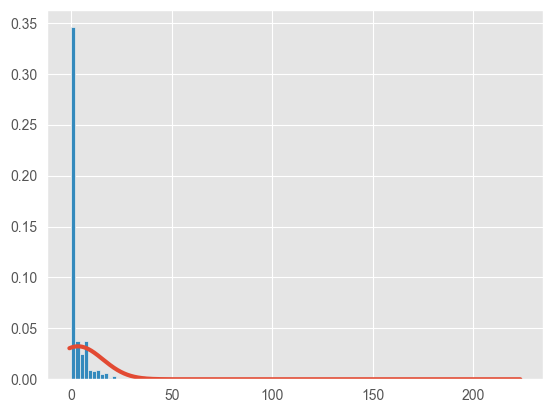

In [36]:
x = np.linspace(min(X)-1, max(X)*1.1, 10000)
norm_rv = st.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(X, bins=bins_number, density=True)
plt.show()

In [38]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - ddof - 1)

In [39]:
chisquare_normal(X, m, s, bins_number)

C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_27788\3253041181.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - normal) ** 2 / normal)
C:\Users\PotatoHD\AppData\Local\Temp\ipykernel_27788\3253041181.py:4: RuntimeWarning: invalid value encountered in divide
  Z = np.sum((counts - normal) ** 2 / normal)


(nan, nan)

### $Z = n\left(\frac{\gamma^2}{6}+\frac{\epsilon^2}{24}\right)$
### $\gamma=\frac{\hat{\mu}_3}{\hat{\sigma}^3}=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^3}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^{3 / 2}}$
### $\epsilon=\frac{\hat{\mu}_4}{\hat{\sigma}^4} - 3=\frac{\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^4}{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right)^2} - 3$
$\gamma - коэффициент асимметрии $
$\epsilon -коэффициент  эксцесса$
 $μ ̂_3$ третий центральный момент
 $μ ̂_4$ четвертый центральный момент
 n - число наблюдений


In [41]:
stats.jarque_bera(X)

Jarque_beraResult(statistic=632630.7365664302, pvalue=0.0)